# TASK 3

## Problem Statement

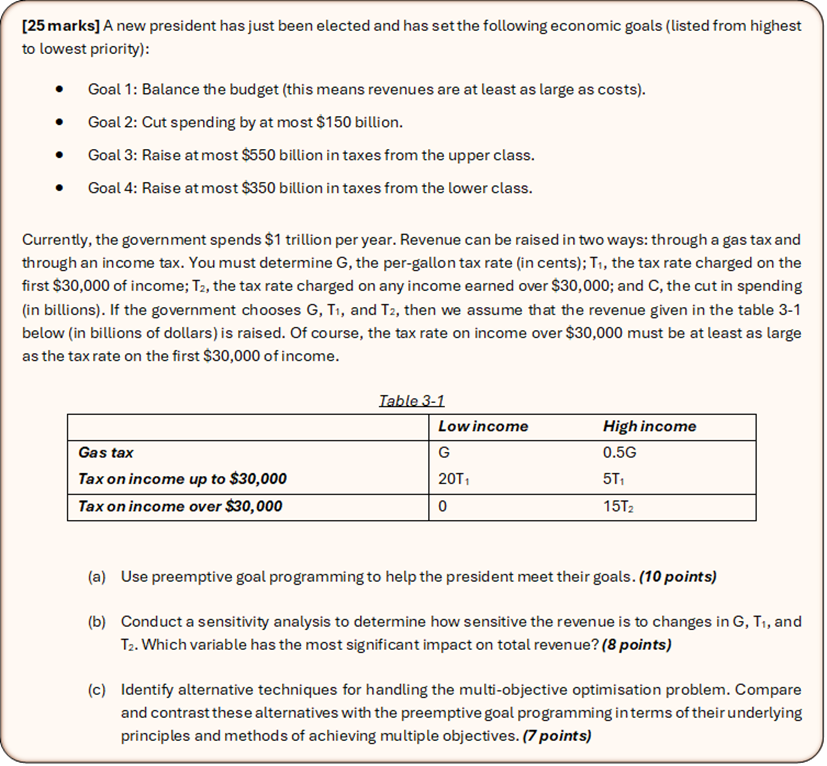

## Part (a)

In [ ]:
# Install and Import PuLP
!pip install pulp
import pulp

In [ ]:
# Create the problem
model = pulp.LpProblem("Preemptive_Goal_Programming", pulp.LpMinimize)

# Decision variables
G = pulp.LpVariable("G", lowBound=0)        # Gas tax rate (cents per gallon)
T1 = pulp.LpVariable("T1", lowBound=0)     # Tax rate for income up to $30,000 (percentage)
T2 = pulp.LpVariable("T2", lowBound=0)     # Tax rate for income above $30,000 (percentage)
C = pulp.LpVariable("C", lowBound=0)       # Spending cut (in billions of dollars)

# Deviation variables
# Goal 1
d1_plus = pulp.LpVariable("d1_plus", lowBound=0)  # Positive deviation for Goal 1
d1_minus = pulp.LpVariable("d1_minus", lowBound=0)  # Negative deviation for Goal 1
# Goal 2
d2_plus = pulp.LpVariable("d2_plus", lowBound=0)  # Positive deviation for Goal 2
# Goal 3
d3_plus = pulp.LpVariable("d3_plus", lowBound=0)  # Positive deviation for Goal 3
# Goal 4
d4_plus = pulp.LpVariable("d4_plus", lowBound=0)  # Positive deviation for Goal 4

# Objective function (Preemptive prioritization)
# P1 >> P2 >> P3 >> P4 (use large weights to enforce priorities)
P1, P2, P3, P4 = 1e6, 1e4, 1e2, 1
model += P1 * d1_minus + P2 * d2_plus + P3 * d3_plus + P4 * d4_plus

# Constraints
# Goal 1: Balance the budget
# Total revenue = 1.5G + 25T1 + 15T2 + C
model += (1.5 * G) + 25 * T1 + 15 * T2 + C + d1_minus - d1_plus == 1000

# Goal 2: Spending cut cap
model += C + d2_plus == 150

# Goal 3: Upper-Class Tax Cap
# Tax from upper class = 0.5G + 5T1 + 15T2
model += (0.5 * G) + 5 * T1 + 15 * T2 + d3_plus == 550

# Goal 4: Lower-Class Tax Cap
# Tax from lower class = G + 20T1
model += G + 20 * T1 + d4_plus == 350

# Additional constraint: T2 >= T1
model += T2 >= T1

# Solve the model
model.solve()

1

In [ ]:
# Display results
print("Status:", pulp.LpStatus[model.status])
print("Objective Value:", pulp.value(model.objective))
print(f"G = {G.value()} cents")
print(f"T1 = {T1.value()} %")
print(f"T2 = {T2.value()} %")
print(f"C = {C.value()} billion dollars")
print(f"d1_plus = {d1_plus.value()}")
print(f"d1_minus = {d1_minus.value()}")
print(f"d2_plus = {d2_plus.value()}")
print(f"d3_plus = {d3_plus.value()}")
print(f"d4_plus = {d4_plus.value()}")

Status: Optimal
Objective Value: 0.0
G = 350.0 cents
T1 = 0.0 %
T2 = 25.0 %
C = 150.0 billion dollars
d1_plus = 50.0
d1_minus = 0.0
d2_plus = 0.0
d3_plus = 0.0
d4_plus = 0.0


## Part (b)

In [ ]:
import pandas as pd
from pulp import LpProblem, LpVariable, LpMinimize, lpSum

# Create the base model (already solved)
model = pulp.LpProblem("Preemptive_Goal_Programming", pulp.LpMinimize)
G = pulp.LpVariable("G", lowBound=0)
T1 = pulp.LpVariable("T1", lowBound=0)
T2 = pulp.LpVariable("T2", lowBound=0)
C = pulp.LpVariable("C", lowBound=0)
d1_plus = pulp.LpVariable("d1_plus", lowBound=0)
d1_minus = pulp.LpVariable("d1_minus", lowBound=0)
d2_plus = pulp.LpVariable("d2_plus", lowBound=0)
d3_plus = pulp.LpVariable("d3_plus", lowBound=0)
d4_plus = pulp.LpVariable("d4_plus", lowBound=0)

P1, P2, P3, P4 = 1e6, 1e4, 1e2, 1
model += P1 * d1_minus + P2 * d2_plus + P3 * d3_plus + P4 * d4_plus
model += (1.5 * G) + 25 * T1 + 15 * T2 + C + d1_minus - d1_plus == 1000
model += C + d2_plus == 150
model += (0.5 * G) + 5 * T1 + 15 * T2 + d3_plus == 550
model += G + 20 * T1 + d4_plus == 350
model += T2 >= T1

# Base values
base_G, base_T1, base_T2, base_C = 350, 0, 25, 150

# Sensitivity increments
increments = [-20, -10, 0, 10, 20]

# Results storage
results = []

for var_name, base_value in [("G", base_G), ("T1", base_T1), ("T2", base_T2)]:
    for change in increments:
        # Adjust the variable
        new_value = base_value * (1 + change / 100)

        # Re-solve with the adjusted variable
        if var_name == "G":
            model += G == new_value
        elif var_name == "T1":
            model += T1 == new_value
        elif var_name == "T2":
            model += T2 == new_value

        # Solve the modified model
        model.solve()

        # Store results
        results.append({
            "Variable": var_name,
            "Change (%)": change,
            "G": G.value(),
            "T1": T1.value(),
            "T2": T2.value(),
            "C": C.value(),
            "Total Revenue": 1.5 * G.value() + 25 * T1.value() + 15 * T2.value() + C.value(),
            "d1_plus": d1_plus.value(),
            "d1_minus": d1_minus.value(),
            "d2_plus": d2_plus.value(),
            "d3_plus": d3_plus.value(),
            "d4_plus": d4_plus.value()
        })

# Convert results to DataFrame
sensitivity_df = pd.DataFrame(results)

# Display results
print(sensitivity_df)

   Variable  Change (%)      G   T1         T2      C  Total Revenue  d1_plus  \
0         G         -20  280.0  3.5  26.166667  150.0    1050.000005     50.0   
1         G         -10  315.0  0.0  26.166667  150.0    1015.000005      0.0   
2         G           0  350.0  0.0  25.000000  150.0    1050.000000      0.0   
3         G          10  385.0  0.0  23.833333  150.0    1084.999995      0.0   
4         G          20  420.0  0.0  22.666667  150.0    1120.000005      0.0   
5        T1         -20  420.0  0.0  22.666667  150.0    1120.000005      0.0   
6        T1         -10  420.0  0.0  22.666667  150.0    1120.000005      0.0   
7        T1           0  420.0  0.0  22.666667  150.0    1120.000005      0.0   
8        T1          10  420.0  0.0  22.666667  150.0    1120.000005      0.0   
9        T1          20  420.0  0.0  22.666667  150.0    1120.000005      0.0   
10       T2         -20  420.0  0.0  22.666667  150.0    1120.000005      0.0   
11       T2         -10  420